In [ ]:
# install uciml repo
!pip install ucimlrepo

# Dataset Analysis
In this section of the code, the (subjective) analysis of the dataset will be done. After long hours of finding a good fit dataset for Linear Regression I finally found a Dataset called "Forest Fires" in UCI. The following below plots the possible contiuous

In [ ]:
SHUFFLE_SEED = 120

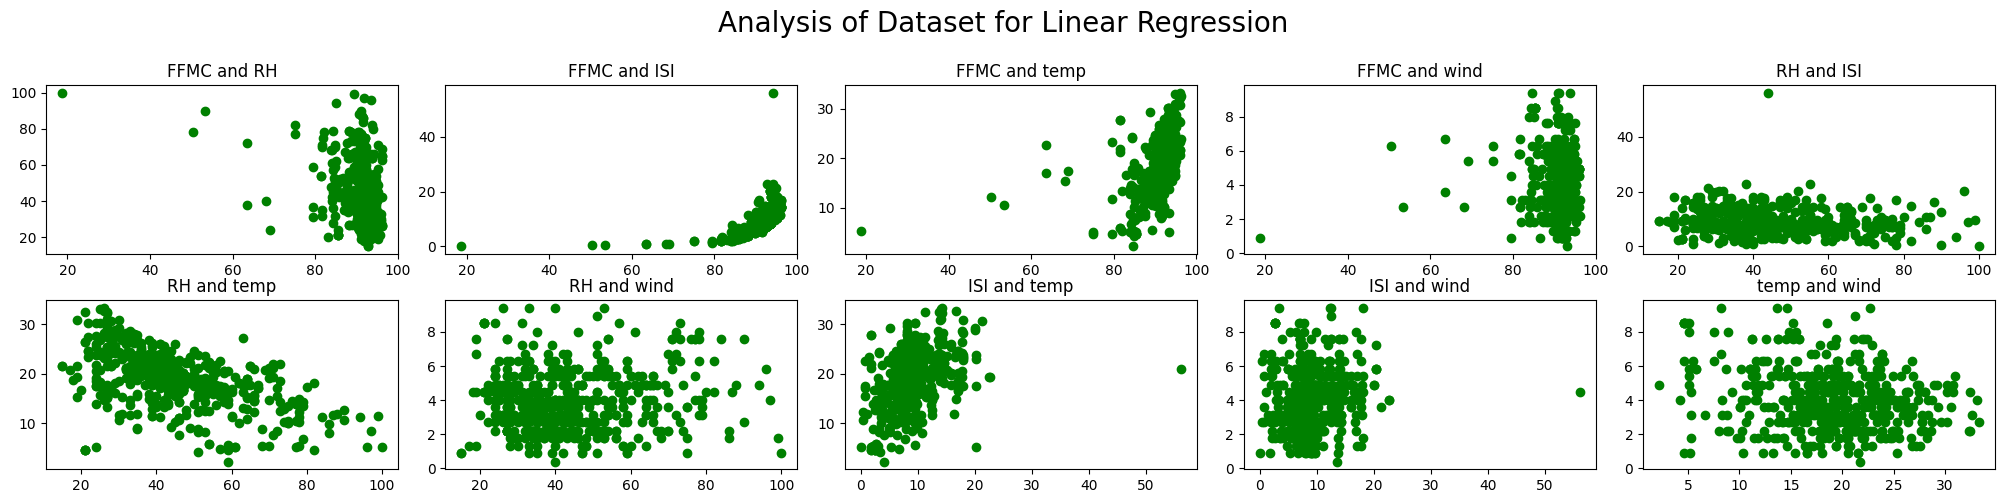

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# fetch dataset
dataset = fetch_ucirepo(id=162)
dataset = dataset.data.features

# data to be used we will be looking for factors that can be used
# to predict the behavior of temperature linearly
selectedFeatures = ['FFMC', 'RH', 'ISI', 'temp', 'wind']
dataset = dataset[selectedFeatures]
dataset.drop_duplicates()

figure, axis = plt.subplots(nrows=2, ncols=5, figsize=(20, 5))

# 5 features
# 5P2 = 10
# show the possible combination per pair
r, c = 0, 0
for xindex in range(len(selectedFeatures)):
  for yindex in range(xindex + 1, len(selectedFeatures)):
    xFeature = selectedFeatures[xindex]
    yFeature = selectedFeatures[yindex]

    xData = dataset[xFeature]
    yData = dataset[yFeature]

    axis[r, c].set_title(f'{xFeature} and {yFeature}')
    axis[r, c].plot(xData, yData, 'o', color='green')

    if (c >= 4):
      c = 0
      r = 1
      continue
    c += 1

figure.tight_layout(pad=0.5)
figure.suptitle('Analysis of Dataset for Linear Regression', fontsize=20)
plt.subplots_adjust(top=0.83)
plt.show()

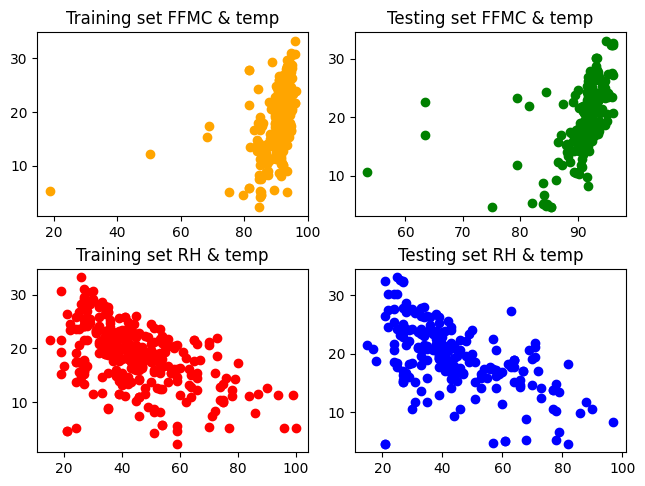

In [ ]:
dataset1 = dataset[['FFMC', 'temp']]
dataset1.drop_duplicates()

xData1 = dataset1['FFMC']
yData1 = dataset1['temp']

dataset2 = dataset[['RH', 'temp']]
dataset2.drop_duplicates()

xData2 = dataset2['RH']
yData2 = dataset2['temp']

xTrain1, xTest1, yTrain1, yTest1 = train_test_split(xData1, yData1, train_size=0.6, random_state=SHUFFLE_SEED)
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(xData2, yData2, train_size=0.6, random_state=SHUFFLE_SEED)

# show the dataset plots
figure, axis = plt.subplots(ncols=2, nrows=2)

# train and test for FFMC nd temp
axis[0, 0].set_title("Training set FFMC & temp")
axis[0, 0].plot(xTrain1, yTrain1, 'o', color='orange')

axis[0, 1].set_title("Testing set FFMC & temp")
axis[0, 1].plot(xTest1, yTest1, 'o', color='green')

axis[1, 0].set_title("Training set RH & temp")
axis[1, 0].plot(xTrain2, yTrain2, 'o', color='red')

axis[1, 1].set_title("Testing set RH & temp")
axis[1, 1].plot(xTest2, yTest2, 'o', color='blue')

figure.tight_layout(pad=0.5)
plt.show()

Evaluation for FFMCTempLinear Model
r2 score of the model:  0.18863563602538325
MAE of the model:  4.046182986003384

Evaluation for RHTempLinearModel Model
r2 score of the model:  0.2906584747604507
MAE of the model:  3.7222865824995215



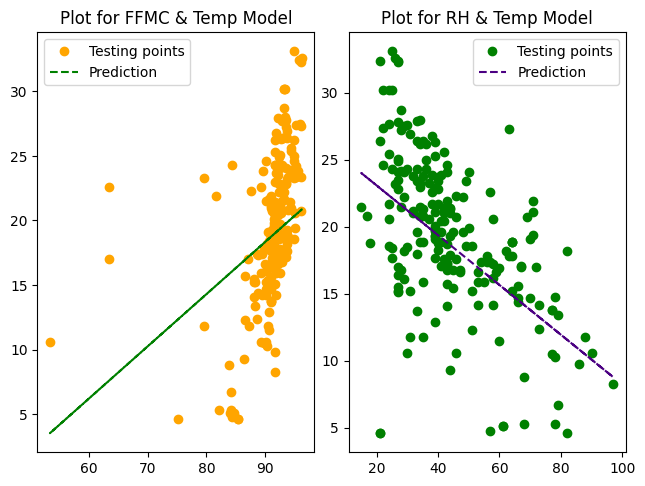

In [ ]:
# reshaping of the dataset for linear model
# train for ffmc & temp
xTrain1 = xTrain1.values.reshape(-1, 1)
yTrain1 = yTrain1.values.reshape(-1, 1)

# test for ffmc & temp
xTest1 = xTest1.values.reshape(-1, 1)
yTest1 = yTest1.values.reshape(-1, 1)

# train for RH & temp
xTrain2 = xTrain2.values.reshape(-1, 1)
yTrain2 = yTrain2.values.reshape(-1, 1)

# test for RH & temp
xTest2 = xTest2.values.reshape(-1, 1)
yTest2 = yTest2.values.reshape(-1, 1)

# linear regression models and fiting
FFMCTempLinearModel = LinearRegression()
FFMCTempLinearModel.fit(xTrain1, yTrain1)

RHTempLinearModel = LinearRegression()
RHTempLinearModel.fit(xTrain2, yTrain2)

# graphs
figure, axis = plt.subplots(ncols=2)

yPred1 = FFMCTempLinearModel.predict(xTest1)
axis[0].set_title('Plot for FFMC & Temp Model')
axis[0].plot(xTest1, yTest1, 'o', color='orange')
axis[0].plot(xTest1, yPred1, '--', color='green')
axis[0].legend(['Testing points', 'Prediction'])

yPred2 = RHTempLinearModel.predict(xTest2)
axis[1].set_title('Plot for RH & Temp Model')
axis[1].plot(xTest2, yTest2, 'o', color='green')
axis[1].plot(xTest2, yPred2, '--', color='indigo')
axis[1].legend(['Testing points', 'Prediction'])

figure.tight_layout(pad=0.5)

# evaluation of the model
print('====================================')
print('Evaluation for FFMCTempLinear Model')
print('====================================')
print('r2 score of the model: ', r2_score(yTest1, yPred1))
print('MAE of the model: ', mean_absolute_error(yTest1, yPred1))
print()
print('====================================')
print('Evaluation for RHTempLinearModel Model')
print('====================================')
print('r2 score of the model: ', r2_score(yTest2, yPred2))
print('MAE of the model: ', mean_absolute_error(yTest2, yPred2))
print()

# Further improvement Through normalization?

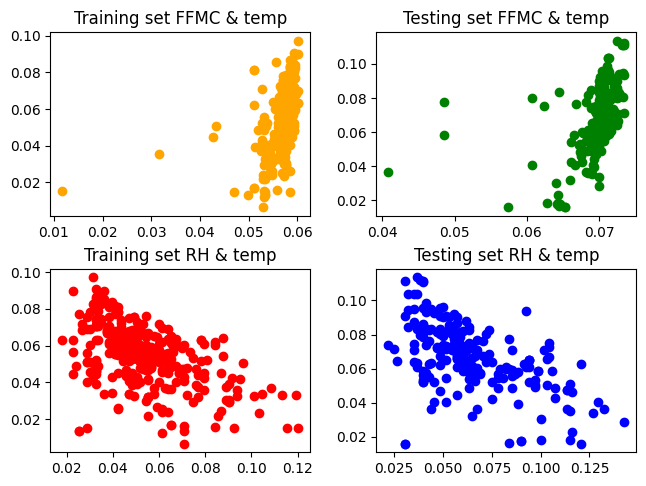

In [ ]:
xTrain1, xTest1, yTrain1, yTest1 = train_test_split(xData1, yData1, train_size=0.6, random_state=SHUFFLE_SEED)
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(xData2, yData2, train_size=0.6, random_state=SHUFFLE_SEED)

xTrain1 = normalize([xTrain1])
yTrain1 = normalize([yTrain1])
xTest1 = normalize([xTest1])
yTest1 = normalize([yTest1])

xTrain2 = normalize([xTrain2])
yTrain2 = normalize([yTrain2])
xTest2 = normalize([xTest2])
yTest2 = normalize([yTest2])

# show the dataset plots
figure, axis = plt.subplots(ncols=2, nrows=2)

# train and test for FFMC nd temp
axis[0, 0].set_title("Training set FFMC & temp")
axis[0, 0].plot(xTrain1, yTrain1, 'o', color='orange')

axis[0, 1].set_title("Testing set FFMC & temp")
axis[0, 1].plot(xTest1, yTest1, 'o', color='green')

axis[1, 0].set_title("Training set RH & temp")
axis[1, 0].plot(xTrain2, yTrain2, 'o', color='red')

axis[1, 1].set_title("Testing set RH & temp")
axis[1, 1].plot(xTest2, yTest2, 'o', color='blue')

figure.tight_layout(pad=0.5)
plt.show()

Evaluation for FFMCTempLinear Model
r2 score of the model:  -0.13839572536482225
MAE of the model:  0.017226243725787266

Evaluation for RHTempLinearModel Model
r2 score of the model:  -0.4712706109302849
MAE of the model:  0.020883376401340907



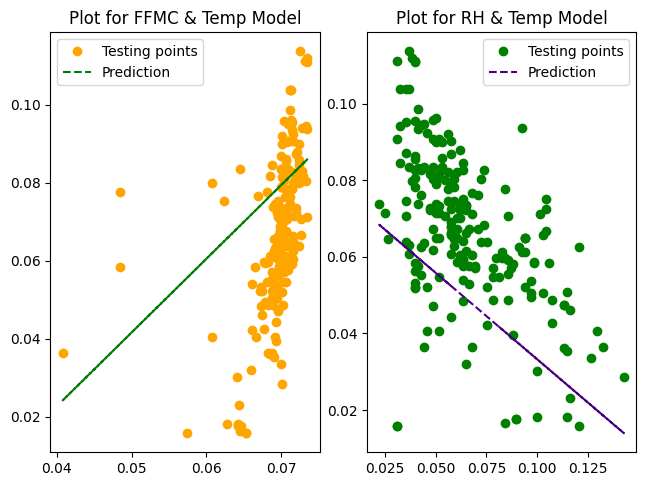

In [ ]:
# reshaping of the dataset for linear model
# train for ffmc & temp
xTrain1 = xTrain1.reshape(-1, 1)
yTrain1 = yTrain1.reshape(-1, 1)

# test for ffmc & temp
xTest1 = xTest1.reshape(-1, 1)
yTest1 = yTest1.reshape(-1, 1)

# train for RH & temp
xTrain2 = xTrain2.reshape(-1, 1)
yTrain2 = yTrain2.reshape(-1, 1)

# test for RH & temp
xTest2 = xTest2.reshape(-1, 1)
yTest2 = yTest2.reshape(-1, 1)

# linear regression models and fiting
FFMCTempLinearModel = LinearRegression()
FFMCTempLinearModel.fit(xTrain1, yTrain1)

RHTempLinearModel = LinearRegression()
RHTempLinearModel.fit(xTrain2, yTrain2)

# graphs
figure, axis = plt.subplots(ncols=2)

yPred1 = FFMCTempLinearModel.predict(xTest1)
axis[0].set_title('Plot for FFMC & Temp Model')
axis[0].plot(xTest1, yTest1, 'o', color='orange')
axis[0].plot(xTest1, yPred1, '--', color='green')
axis[0].legend(['Testing points', 'Prediction'])

yPred2 = RHTempLinearModel.predict(xTest2)
axis[1].set_title('Plot for RH & Temp Model')
axis[1].plot(xTest2, yTest2, 'o', color='green')
axis[1].plot(xTest2, yPred2, '--', color='indigo')
axis[1].legend(['Testing points', 'Prediction'])

figure.tight_layout(pad=0.5)

# evaluation of the model
print('====================================')
print('Evaluation for FFMCTempLinear Model')
print('====================================')
print('r2 score of the model: ', r2_score(yTest1, yPred1))
print('MAE of the model: ', mean_absolute_error(yTest1, yPred1))
print()
print('====================================')
print('Evaluation for RHTempLinearModel Model')
print('====================================')
print('r2 score of the model: ', r2_score(yTest2, yPred2))
print('MAE of the model: ', mean_absolute_error(yTest2, yPred2))
print()